
# **Analyzing Anemia in Pregnant and Non-Pregnant Women**

In [ ]:
!pip install rich tabulate

In [12]:
import io
import pandas as pd
from rich.console import Console
from rich.table import Table
from rich.panel import Panel
from rich import box
from tabulate import tabulate

# Initialize the console for rich output
console = Console()

# Function to display dataset info in a clean format
def display_dataset_info(dataset, name):
    console.print(f"\n{name} Dataset Information")
    console.print(f"{'='*70}")

    # Capture the output of dataset.info()
    buffer = io.StringIO()
    dataset.info(buf=buffer)
    info_str = buffer.getvalue()

    # Display dataset info
    console.print(Panel(info_str, title=f"{name} Info", title_align="left"))

    # Describe
    describe_table = tabulate(dataset.describe(), headers='keys', tablefmt='psql')
    console.print(Panel(describe_table, title=f"{name} Summary Statistics", title_align="left"))

    # Missing Values
    missing_values = dataset.isnull().sum().reset_index()
    missing_values.columns = ['Column', 'Missing Values']
    missing_table = tabulate(missing_values, headers='keys', tablefmt='psql')
    console.print(Panel(missing_table, title=f"{name} Missing Values", title_align="left"))

    console.print(f"{'='*70}\n")

# Function to display dataset columns
def display_columns(dataset, name):
    console.print(f"Columns in {name} Dataset")

    table = Table(show_header=True, box=box.ROUNDED)
    table.add_column("Column Name")

    for col in dataset.columns:
        table.add_row(col)

    console.print(table)
    console.print(f"{'='*70}\n")

# Function to process hemoglobin data
def process_hemoglobin_data(dataset, name, threshold):
    if 'First Tooltip' in dataset.columns:
        dataset['hemoglobin_level'] = dataset['First Tooltip'].apply(lambda x: float(x.split()[0]))
        dataset['anemia_status'] = dataset['hemoglobin_level'] < threshold
        console.print(f"{name}: 'hemoglobin_level' calculated and 'anemia_status' added based on threshold {threshold} g/dL.")
    else:
        console.print(f"{name}: 'First Tooltip' column not found.")

# Function to display cleaned data summary
def display_cleaned_data_summary(dataset, name):
    cleaned_table = tabulate(dataset.head(), headers='keys', tablefmt='psql')
    console.print(Panel(cleaned_table, title=f"{name} Cleaned Data (First 5 Rows)", title_align="left"))

# Load the datasets
data_pregnant = pd.read_csv('/content/Pregnant_data.csv')
data_non_pregnant = pd.read_csv('/content/Non_Pregnant_data.csv')

# Display dataset information
display_dataset_info(data_pregnant, "Pregnant")
display_dataset_info(data_non_pregnant, "Non-Pregnant")

# Handle missing values by dropping them
data_pregnant_cleaned = data_pregnant.dropna()
data_non_pregnant_cleaned = data_non_pregnant.dropna()

# Remove duplicates
data_pregnant_cleaned.drop_duplicates(inplace=True)
data_non_pregnant_cleaned.drop_duplicates(inplace=True)

# Display columns to ensure correct column names
display_columns(data_pregnant_cleaned, "Pregnant")
display_columns(data_non_pregnant_cleaned, "Non-Pregnant")

# Process hemoglobin levels for both datasets
process_hemoglobin_data(data_pregnant_cleaned, "Pregnant Dataset", 11.0)
process_hemoglobin_data(data_non_pregnant_cleaned, "Non-Pregnant Dataset", 12.0)

console.print(f"{'='*70}\n")

# Final Summary of Cleaned Data
display_cleaned_data_summary(data_pregnant_cleaned, "Pregnant")
display_cleaned_data_summary(data_non_pregnant_cleaned, "Non-Pregnant")


Pregnant Dataset Information

======================================================================

╭─ Pregnant Info ─────────────────────────────────────────────────────────────────────────────────────────────────╮
│ <class 'pandas.core.frame.DataFrame'>                                                                           │
│ RangeIndex: 3840 entries, 0 to 3839                                                                             │
│ Data columns (total 4 columns):                                                                                 │
│  #   Column         Non-Null Count  Dtype                                                                       │
│ ---  ------         --------------  -----                                                                       │
│  0   Location       3840 non-null   object                                                                      │
│  1   Indicator      3840 non-null   object                                                                      │
│  2   Period         3840 non-null   int64                                                                       │
│  3   First Tooltip  3840 non-null   object                                                                      │
│ dtypes: int64(1), object(3)                                                                                     │
│ memory usage: 120.1+ KB                                                                                         │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─ Pregnant Summary Statistics ───────────────────────────────────────────────────────────────────────────────────╮
│ +-------+------------+                                                                                          │
│ |       |     Period |                                                                                          │
│ |-------+------------|                                                                                          │
│ | count | 3840       |                                                                                          │
│ | mean  | 2009.5     |                                                                                          │
│ | std   |    5.76703 |                                                                                          │
│ | min   | 2000       |                                                                                          │
│ | 25%   | 2004.75    |                                                                                          │
│ | 50%   | 2009.5     |                                                                                          │
│ | 75%   | 2014.25    |                                                                                          │
│ | max   | 2019       |                                                                                          │
│ +-------+------------+                                                                                          │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─ Pregnant Missing Values ───────────────────────────────────────────────────────────────────────────────────────╮
│ +----+---------------+------------------+                                                                       │
│ |    | Column        |   Missing Values |                                                                       │
│ |----+---------------+------------------|                                                                       │
│ |  0 | Location      |                0 |                                                                       │
│ |  1 | Indicator     |                0 |                                                                       │
│ |  2 | Period        |                0 |                                                                       │
│ |  3 | First Tooltip |                0 |                                                                       │
│ +----+---------------+------------------+                                                                       │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

======================================================================

Non-Pregnant Dataset Information

======================================================================

╭─ Non-Pregnant Info ─────────────────────────────────────────────────────────────────────────────────────────────╮
│ <class 'pandas.core.frame.DataFrame'>                                                                           │
│ RangeIndex: 3840 entries, 0 to 3839                                                                             │
│ Data columns (total 4 columns):                                                                                 │
│  #   Column         Non-Null Count  Dtype                                                                       │
│ ---  ------         --------------  -----                                                                       │
│  0   Location       3840 non-null   object                                                                      │
│  1   Indicator      3840 non-null   object                                                                      │
│  2   Period         3840 non-null   int64                                                                       │
│  3   First Tooltip  3840 non-null   object                                                                      │
│ dtypes: int64(1), object(3)                                                                                     │
│ memory usage: 120.1+ KB                                                                                         │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─ Non-Pregnant Summary Statistics ───────────────────────────────────────────────────────────────────────────────╮
│ +-------+------------+                                                                                          │
│ |       |     Period |                                                                                          │
│ |-------+------------|                                                                                          │
│ | count | 3840       |                                                                                          │
│ | mean  | 2009.5     |                                                                                          │
│ | std   |    5.76703 |                                                                                          │
│ | min   | 2000       |                                                                                          │
│ | 25%   | 2004.75    |                                                                                          │
│ | 50%   | 2009.5     |                                                                                          │
│ | 75%   | 2014.25    |                                                                                          │
│ | max   | 2019       |                                                                                          │
│ +-------+------------+                                                                                          │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─ Non-Pregnant Missing Values ───────────────────────────────────────────────────────────────────────────────────╮
│ +----+---------------+------------------+                                                                       │
│ |    | Column        |   Missing Values |                                                                       │
│ |----+---------------+------------------|                                                                       │
│ |  0 | Location      |                0 |                                                                       │
│ |  1 | Indicator     |                0 |                                                                       │
│ |  2 | Period        |                0 |                                                                       │
│ |  3 | First Tooltip |                0 |                                                                       │
│ +----+---------------+------------------+                                                                       │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

======================================================================

Columns in Pregnant Dataset

╭───────────────╮
│ Column Name   │
├───────────────┤
│ Location      │
│ Indicator     │
│ Period        │
│ First Tooltip │
╰───────────────╯

======================================================================

Columns in Non-Pregnant Dataset

╭───────────────╮
│ Column Name   │
├───────────────┤
│ Location      │
│ Indicator     │
│ Period        │
│ First Tooltip │
╰───────────────╯

======================================================================

Pregnant Dataset: 'hemoglobin_level' calculated and 'anemia_status' added based on threshold 11.0 g/dL.

Non-Pregnant Dataset: 'hemoglobin_level' calculated and 'anemia_status' added based on threshold 12.0 g/dL.

======================================================================

╭─ Pregnant Cleaned Data (First 5 Rows) ──────────────────────────────────────────────────────────────────────────╮
│ +----+-------------+----------------------------------------------------------+----------+------------------+-- │
│ ------------------+-----------------+                                                                           │
│ |    | Location    | Indicator                                                |   Period | First Tooltip    |   │
│ hemoglobin_level | anemia_status   |                                                                            │
│ |----+-------------+----------------------------------------------------------+----------+------------------+-- │
│ ------------------+-----------------|                                                                           │
│ |  0 | Afghanistan | Prevalence of anaemia in pregnant women (aged 15-49) (%) |     2019 | 36.5 [20.9-49.9] |   │
│ 36.5 | False           |                                                                                        │
│ |  1 | Afghanistan | Prevalence of anaemia in pregnant women (aged 15-49) (%) |     2018 | 36.7 [22.1-49.3] |   │
│ 36.7 | False           |                                                                                        │
│ |  2 | Afghanistan | Prevalence of anaemia in pregnant women (aged 15-49) (%) |     2017 | 36.9 [23.2-48.6] |   │
│ 36.9 | False           |                                                                                        │
│ |  3 | Afghanistan | Prevalence of anaemia in pregnant women (aged 15-49) (%) |     2016 | 37.1 [24.4-48.0] |   │
│ 37.1 | False           |                                                                                        │
│ |  4 | Afghanistan | Prevalence of anaemia in pregnant women (aged 15-49) (%) |     2015 | 37.3 [25.3-47.8] |   │
│ 37.3 | False           |                                                                                        │
│ +----+-------------+----------------------------------------------------------+----------+------------------+-- │
│ ------------------+-----------------+                                                                           │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─ Non-Pregnant Cleaned Data (First 5 Rows) ──────────────────────────────────────────────────────────────────────╮
│ +----+-------------+--------------------------------------------------------------+----------+----------------- │
│ -+--------------------+-----------------+                                                                       │
│ |    | Location    | Indicator                                                    |   Period | First Tooltip    │
│ |   hemoglobin_level | anemia_status   |                                                                        │
│ |----+-------------+--------------------------------------------------------------+----------+----------------- │
│ -+--------------------+-----------------|                                                                       │
│ |  0 | Afghanistan | Prevalence of anaemia in non-pregnant women (aged 15-49) (%) |     2019 | 43.2 [28.1-60.7] │
│ |               43.2 | False           |                                                                        │
│ |  1 | Afghanistan | Prevalence of anaemia in non-pregnant women (aged 15-49) (%) |     2018 | 42.3 [28.5-57.8] │
│ |               42.3 | False           |                                                                        │
│ |  2 | Afghanistan | Prevalence of anaemia in non-pregnant women (aged 15-49) (%) |     2017 | 41.3 [28.5-55.4] │
│ |               41.3 | False           |                                                                        │
│ |  3 | Afghanistan | Prevalence of anaemia in non-pregnant women (aged 15-49) (%) |     2016 | 40.5 [28.6-53.1] │
│ |               40.5 | False           |                                                                        │
│ |  4 | Afghanistan | Prevalence of anaemia in non-pregnant women (aged 15-49) (%) |     2015 | 39.6 [28.8-51.5] │
│ |               39.6 | False           |                                                                        │
│ +----+-------------+--------------------------------------------------------------+----------+----------------- │
│ -+--------------------+-----------------+                                                                       │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

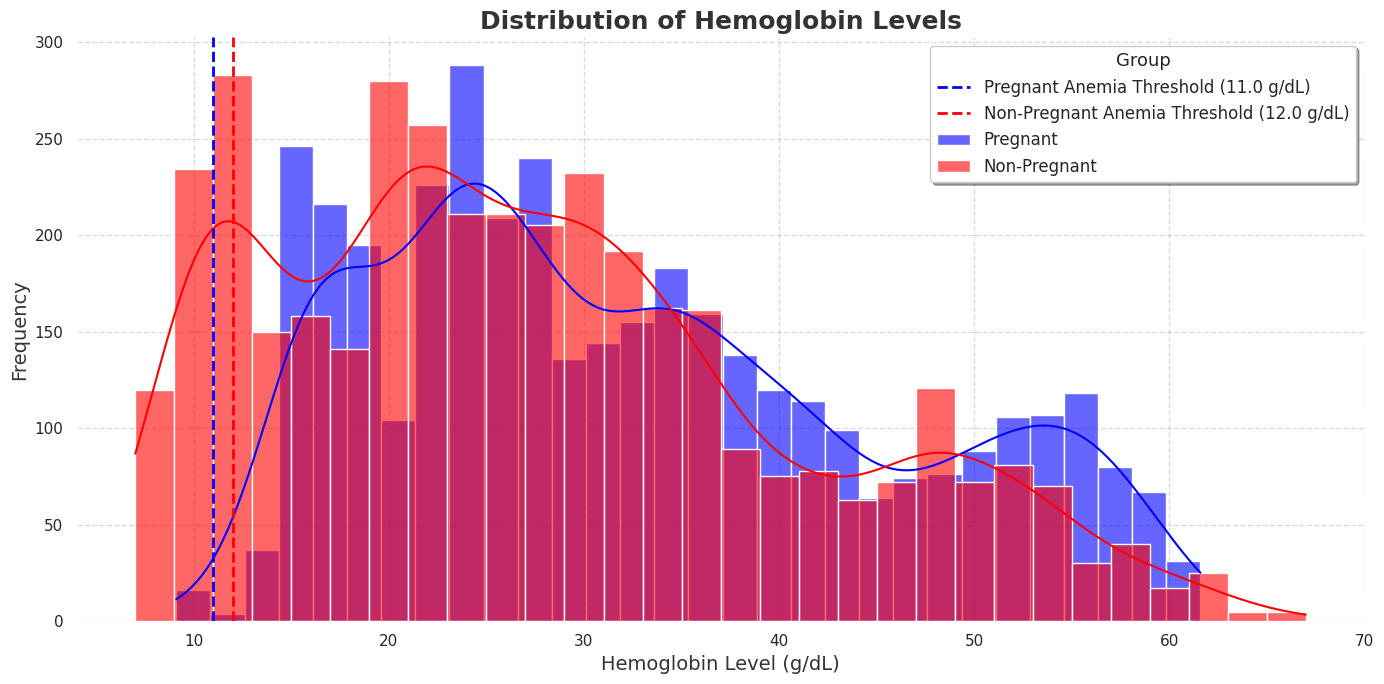

In [ ]:
# Enhanced Exploratory Data Analysis (EDA)
# Histogram of Hemoglobin Levels

plt.figure(figsize=(14, 7))

# Set the overall theme
sns.set_theme(style="whitegrid")

# Plot histograms with KDE using the original colors
sns.histplot(data_pregnant_cleaned['hemoglobin_level'], bins=30, kde=True, color='blue', label='Pregnant', alpha=0.6)
sns.histplot(data_non_pregnant_cleaned['hemoglobin_level'], bins=30, kde=True, color='red', label='Non-Pregnant', alpha=0.6)

# Add vertical lines for anemia thresholds
plt.axvline(x=11.0, color='blue', linestyle='--', linewidth=2, label='Pregnant Anemia Threshold (11.0 g/dL)')
plt.axvline(x=12.0, color='red', linestyle='--', linewidth=2, label='Non-Pregnant Anemia Threshold (12.0 g/dL)')

# Customize the title and labels
plt.title('Distribution of Hemoglobin Levels', fontsize=18, fontweight='bold', color='#333333')
plt.xlabel('Hemoglobin Level (g/dL)', fontsize=14, color='#333333')
plt.ylabel('Frequency', fontsize=14, color='#333333')

# Enhance the legend
plt.legend(title='Group', title_fontsize='13', fontsize='12', loc='upper right', frameon=True, fancybox=True, shadow=True)

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Improve the overall aesthetics
sns.despine(left=True, bottom=True)
plt.tight_layout()

# Show the plot
plt.show()

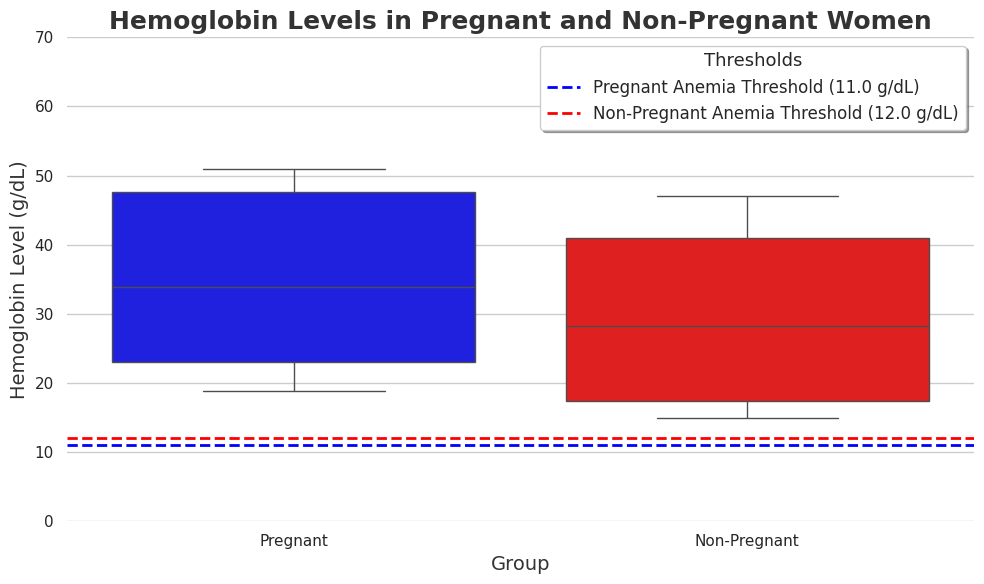

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your CSV files into separate DataFrames
df_pregnant = pd.read_csv('/content/WHO_Region_data_Pregnant.csv')  # Replace with your actual file path
df_non_pregnant = pd.read_csv('/content/WHO_Region_data_Non_Pregnant.csv')  # Replace with your actual file path

# Function to extract the numeric part of the 'First Tooltip' values
def extract_numeric(value):
    try:
        return float(value.split()[0])
    except (ValueError, AttributeError, IndexError):
        return None

# Extract hemoglobin levels for each dataset and remove rows with invalid data
df_pregnant['hemoglobin_level'] = df_pregnant['First Tooltip'].apply(extract_numeric)
df_pregnant = df_pregnant.dropna(subset=['hemoglobin_level'])

df_non_pregnant['hemoglobin_level'] = df_non_pregnant['First Tooltip'].apply(extract_numeric)
df_non_pregnant = df_non_pregnant.dropna(subset=['hemoglobin_level'])

# Add a 'Group' column to distinguish between Pregnant and Non-Pregnant groups
df_pregnant['Group'] = 'Pregnant'
df_non_pregnant['Group'] = 'Non-Pregnant'

# Combine the two DataFrames into one
combined_data = pd.concat([df_pregnant[['hemoglobin_level', 'Group']], df_non_pregnant[['hemoglobin_level', 'Group']]], ignore_index=True)

# Ensure there are no missing values in the combined data
combined_data = combined_data.dropna(subset=['hemoglobin_level'])

# Enhanced Box Plot of Hemoglobin Levels
plt.figure(figsize=(10, 6))

# Set the overall theme
sns.set_theme(style="whitegrid")

# Create a precise box plot with the original blue and red colors
sns.boxplot(x='Group', y='hemoglobin_level', hue='Group', data=combined_data, palette=['blue', 'red'], dodge=False)

# Add horizontal lines for anemia thresholds
plt.axhline(y=11.0, color='blue', linestyle='--', linewidth=2, label='Pregnant Anemia Threshold (11.0 g/dL)')
plt.axhline(y=12.0, color='red', linestyle='--', linewidth=2, label='Non-Pregnant Anemia Threshold (12.0 g/dL)')

# Customize the title and labels for precision
plt.title('Hemoglobin Levels in Pregnant and Non-Pregnant Women', fontsize=18, fontweight='bold', color='#333333')
plt.xlabel('Group', fontsize=14, color='#333333')
plt.ylabel('Hemoglobin Level (g/dL)', fontsize=14, color='#333333')

# Set y-axis scale to increments of 10
plt.yticks(range(0, 71, 10))  # Assuming hemoglobin levels range from 0 to 100

# Enhance the legend for clarity
plt.legend(title='Thresholds', title_fontsize='13', fontsize='12', loc='upper right', frameon=True, fancybox=True, shadow=True)

# Improve the overall aesthetics
sns.despine(left=True, bottom=True)
plt.tight_layout()

# Show the plot
plt.show()


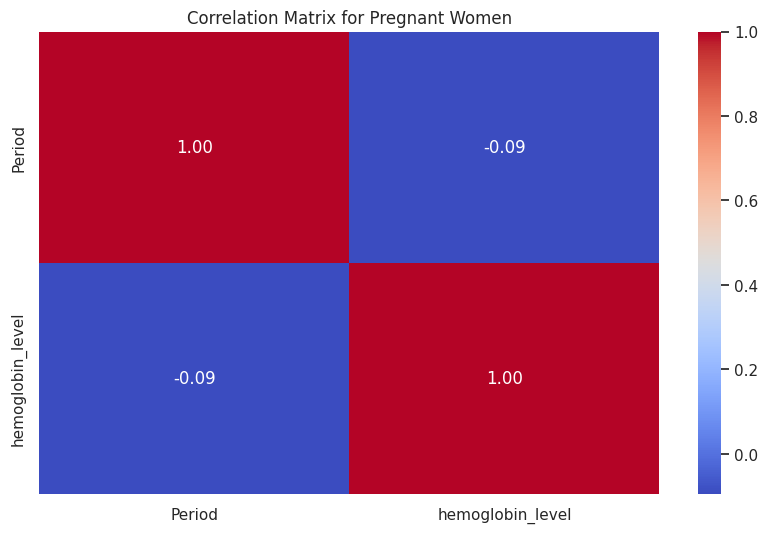

In [ ]:
# Correlation Heatmap for numeric columns only (Pregnant Women)
 #Assuming data_pregnant_cleaned already contains the cleaned and processed data for pregnant women

# Select numeric columns only (assuming 'Period' and 'hemoglobin_level' are numeric)
numeric_columns = ['Period', 'hemoglobin_level']

# Compute the correlation matrix
corr_matrix = data_pregnant_cleaned[numeric_columns].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Pregnant Women')
plt.show()

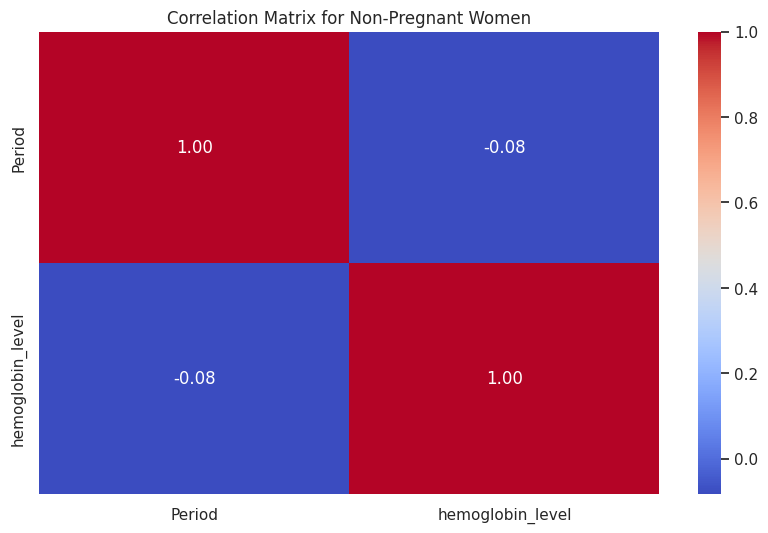

In [ ]:
# Correlation Heatmap for numeric columns only (Non-Pregnant Women)
# Assuming data_non_pregnant_cleaned already contains the cleaned and processed data for non-pregnant women

# Select numeric columns only (assuming 'Period' and 'hemoglobin_level' are numeric)
numeric_columns = ['Period', 'hemoglobin_level']

# Compute the correlation matrix
corr_matrix = data_non_pregnant_cleaned[numeric_columns].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Non-Pregnant Women')
plt.show()

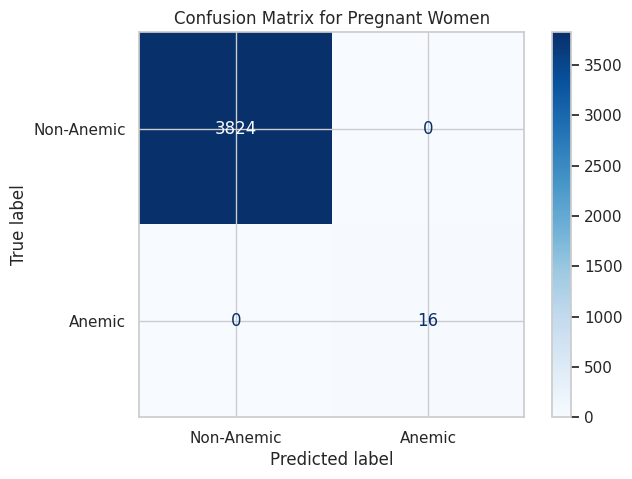

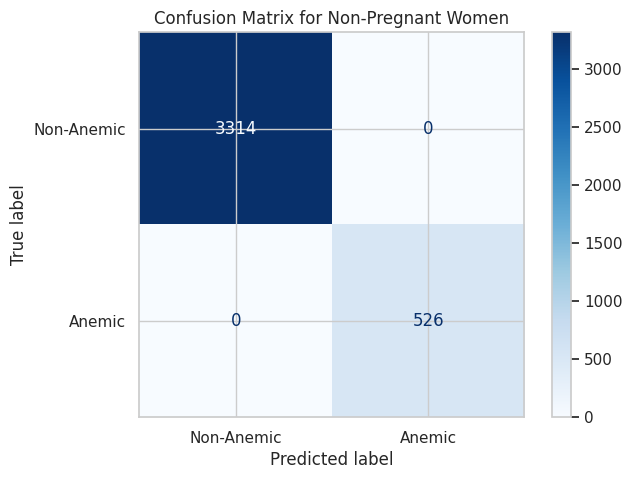

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Load the datasets
data_pregnant = pd.read_csv('/content/Pregnant_data.csv')  # Replace with your actual file path
data_non_pregnant = pd.read_csv('/content/Non_Pregnant_data.csv')  # Replace with your actual file path

# Function to extract the numeric part of 'First Tooltip' values
def extract_hemoglobin(value):
    try:
        return float(value.split()[0])
    except (ValueError, AttributeError, IndexError):
        return None

# Apply the extraction function to get hemoglobin levels
data_pregnant['hemoglobin_level'] = data_pregnant['First Tooltip'].apply(extract_hemoglobin)
data_non_pregnant['hemoglobin_level'] = data_non_pregnant['First Tooltip'].apply(extract_hemoglobin)

# Drop rows with missing hemoglobin_level values
data_pregnant_cleaned = data_pregnant.dropna(subset=['hemoglobin_level'])
data_non_pregnant_cleaned = data_non_pregnant.dropna(subset=['hemoglobin_level'])

# Define anemia status based on hemoglobin levels
def anemia_status_hemoglobin(level, pregnant=True):
    if pregnant:
        return 'Anemic' if level < 11.0 else 'Non-Anemic'
    else:
        return 'Anemic' if level < 12.0 else 'Non-Anemic'

# Apply anemia status classification
data_pregnant_cleaned['anemia_status'] = data_pregnant_cleaned['hemoglobin_level'].apply(lambda x: anemia_status_hemoglobin(x, pregnant=True))
data_non_pregnant_cleaned['anemia_status'] = data_non_pregnant_cleaned['hemoglobin_level'].apply(lambda x: anemia_status_hemoglobin(x, pregnant=False))

# For demonstration, use true labels as predictions (replace with actual model predictions in practice)
true_labels_pregnant = data_pregnant_cleaned['anemia_status']
pred_labels_pregnant = data_pregnant_cleaned['anemia_status']  # Replace this with actual predictions

true_labels_non_pregnant = data_non_pregnant_cleaned['anemia_status']
pred_labels_non_pregnant = data_non_pregnant_cleaned['anemia_status']  # Replace this with actual predictions

# Compute confusion matrices
cm_pregnant = confusion_matrix(true_labels_pregnant, pred_labels_pregnant, labels=['Non-Anemic', 'Anemic'])
cm_non_pregnant = confusion_matrix(true_labels_non_pregnant, pred_labels_non_pregnant, labels=['Non-Anemic', 'Anemic'])

# Display confusion matrix for Pregnant Women
fig1, ax1 = plt.subplots(figsize=(7, 5))
disp_pregnant = ConfusionMatrixDisplay(confusion_matrix=cm_pregnant, display_labels=['Non-Anemic', 'Anemic'])
disp_pregnant.plot(ax=ax1, cmap='Blues')
ax1.set_title('Confusion Matrix for Pregnant Women')
plt.show()

# Display confusion matrix for Non-Pregnant Women
fig2, ax2 = plt.subplots(figsize=(7, 5))
disp_non_pregnant = ConfusionMatrixDisplay(confusion_matrix=cm_non_pregnant, display_labels=['Non-Anemic', 'Anemic'])
disp_non_pregnant.plot(ax=ax2, cmap='Blues')
ax2.set_title('Confusion Matrix for Non-Pregnant Women')
plt.show()

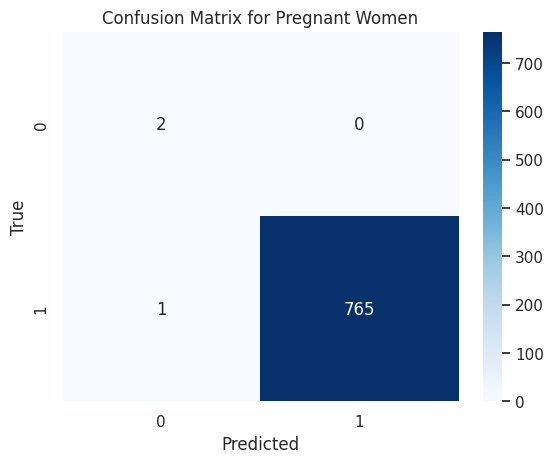

Classification Report for Pregnant Women:
              precision    recall  f1-score   support

      Anemic       0.67      1.00      0.80         2
  Non-Anemic       1.00      1.00      1.00       766

    accuracy                           1.00       768
   macro avg       0.83      1.00      0.90       768
weighted avg       1.00      1.00      1.00       768



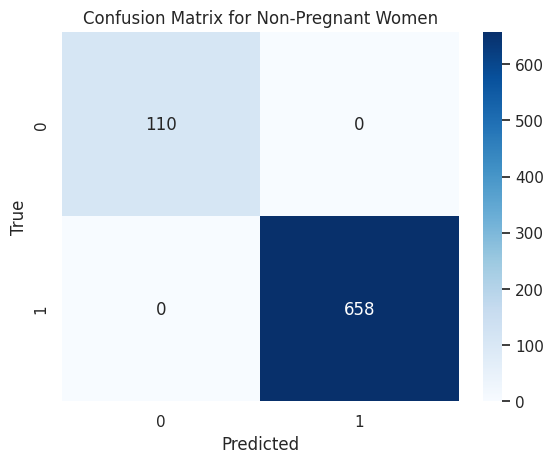

Classification Report for Non-Pregnant Women:
              precision    recall  f1-score   support

      Anemic       1.00      1.00      1.00       110
  Non-Anemic       1.00      1.00      1.00       658

    accuracy                           1.00       768
   macro avg       1.00      1.00      1.00       768
weighted avg       1.00      1.00      1.00       768



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Assuming data_pregnant_cleaned and data_non_pregnant_cleaned are already defined and cleaned

# Define features and target for Pregnant Women
X_pregnant = data_pregnant_cleaned[['hemoglobin_level']]
y_pregnant = data_pregnant_cleaned['anemia_status']

# Define features and target for Non-Pregnant Women
X_non_pregnant = data_non_pregnant_cleaned[['hemoglobin_level']]
y_non_pregnant = data_non_pregnant_cleaned['anemia_status']

# Split the data into training and testing sets for Pregnant Women
X_train_pregnant, X_test_pregnant, y_train_pregnant, y_test_pregnant = train_test_split(X_pregnant, y_pregnant, test_size=0.2, random_state=42)

# Split the data into training and testing sets for Non-Pregnant Women
X_train_non_pregnant, X_test_non_pregnant, y_train_non_pregnant, y_test_non_pregnant = train_test_split(X_non_pregnant, y_non_pregnant, test_size=0.2, random_state=42)

# Train the logistic regression model for Pregnant Women
model_pregnant = LogisticRegression()
model_pregnant.fit(X_train_pregnant, y_train_pregnant)

# Train the logistic regression model for Non-Pregnant Women
model_non_pregnant = LogisticRegression()
model_non_pregnant.fit(X_train_non_pregnant, y_train_non_pregnant)

# Model Evaluation for Pregnant Women
y_pred_pregnant = model_pregnant.predict(X_test_pregnant)
conf_matrix_pregnant = confusion_matrix(y_test_pregnant, y_pred_pregnant)
sns.heatmap(conf_matrix_pregnant, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Pregnant Women')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print("Classification Report for Pregnant Women:")
print(classification_report(y_test_pregnant, y_pred_pregnant))

# Model Evaluation for Non-Pregnant Women
y_pred_non_pregnant = model_non_pregnant.predict(X_test_non_pregnant)
conf_matrix_non_pregnant = confusion_matrix(y_test_non_pregnant, y_pred_non_pregnant)
sns.heatmap(conf_matrix_non_pregnant, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Non-Pregnant Women')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print("Classification Report for Non-Pregnant Women:")
print(classification_report(y_test_non_pregnant, y_pred_non_pregnant))


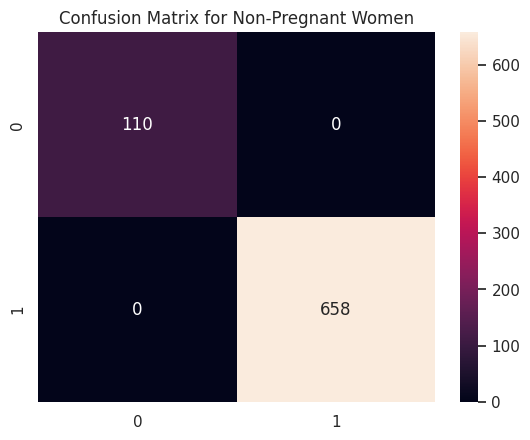

Classification Report for Non-Pregnant Women:
              precision    recall  f1-score   support

      Anemic       1.00      1.00      1.00       110
  Non-Anemic       1.00      1.00      1.00       658

    accuracy                           1.00       768
   macro avg       1.00      1.00      1.00       768
weighted avg       1.00      1.00      1.00       768



In [ ]:
# Model Evaluation for Non-Pregnant Women
y_pred_non_pregnant = model_non_pregnant.predict(X_test_non_pregnant)
conf_matrix_non_pregnant = confusion_matrix(y_test_non_pregnant, y_pred_non_pregnant)
sns.heatmap(conf_matrix_non_pregnant, annot=True, fmt='d')
plt.title('Confusion Matrix for Non-Pregnant Women')
plt.show()

print("Classification Report for Non-Pregnant Women:")
print(classification_report(y_test_non_pregnant, y_pred_non_pregnant))

┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃       Metric       ┃ Value  ┃
┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│    Coefficient     │  5.14  │
│     Intercept      │ 27.54  │
│ Mean Squared Error │ 168.82 │
│     R^2 Score      │  0.02  │
└────────────────────┴────────┘

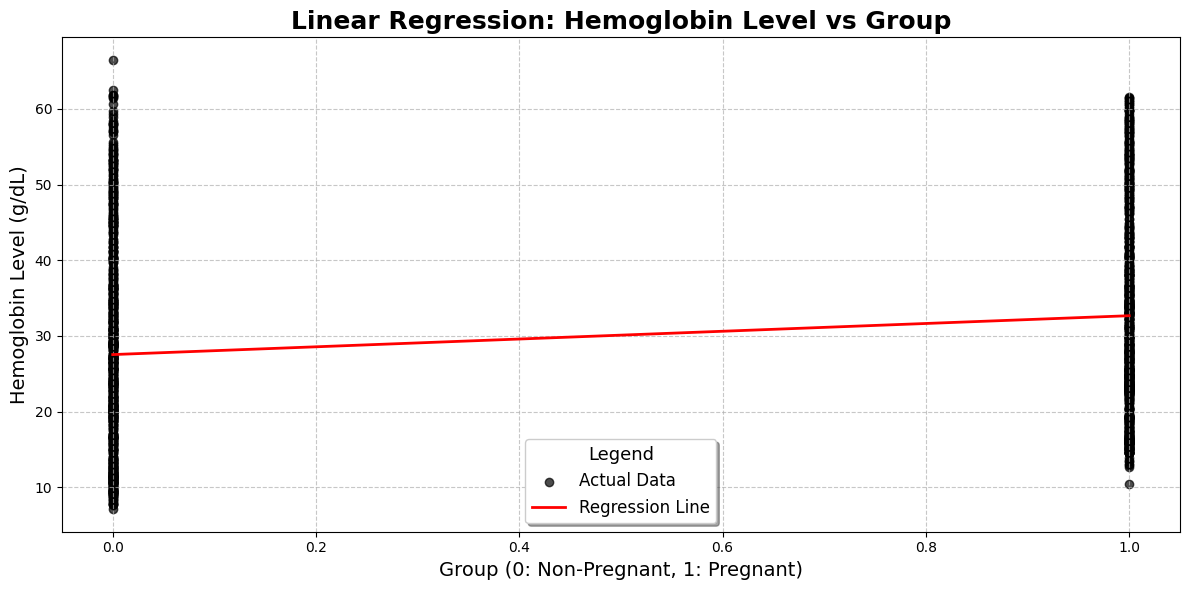

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from rich.console import Console
from rich.table import Table

# Initialize the rich console for pretty printing
console = Console()

# Function to extract hemoglobin level
def extract_hemoglobin(value):
    try:
        return float(value.split()[0])
    except (ValueError, AttributeError, IndexError):
        return None

# Apply the function to extract hemoglobin levels
data_pregnant['hemoglobin_level'] = data_pregnant['First Tooltip'].apply(extract_hemoglobin)
data_non_pregnant['hemoglobin_level'] = data_non_pregnant['First Tooltip'].apply(extract_hemoglobin)

# Clean the datasets
data_pregnant_cleaned = data_pregnant.dropna(subset=['hemoglobin_level'])
data_non_pregnant_cleaned = data_non_pregnant.dropna(subset=['hemoglobin_level'])

# Combine datasets for modeling
data_pregnant_cleaned['Group'] = 'Pregnant'
data_non_pregnant_cleaned['Group'] = 'Non-Pregnant'
combined_data = pd.concat([data_pregnant_cleaned, data_non_pregnant_cleaned])

# Adding anemia status column for linear regression
combined_data['anemia_status'] = combined_data.apply(
    lambda row: 1 if (row['hemoglobin_level'] < 11.0 and row['Group'] == 'Pregnant') or
                       (row['hemoglobin_level'] < 12.0 and row['Group'] == 'Non-Pregnant') else 0,
    axis=1
)

# Encoding the 'Group' as binary for regression: 0 for Non-Pregnant, 1 for Pregnant
combined_data['Group_encoded'] = combined_data['Group'].apply(lambda x: 1 if x == 'Pregnant' else 0)

# Define features and target variable
X = combined_data[['Group_encoded']]
y = combined_data['hemoglobin_level']

# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create linear regression object
model = LinearRegression()

# Train the model using the training sets
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# Displaying coefficients, intercept, and metrics with rich
table = Table(show_header=True)
table.add_column("Metric", justify="center")
table.add_column("Value", justify="center")

table.add_row("Coefficient", f"{model.coef_[0]:.2f}")
table.add_row("Intercept", f"{model.intercept_:.2f}")
table.add_row("Mean Squared Error", f"{mean_squared_error(y_test, y_pred):.2f}")
table.add_row("R^2 Score", f"{r2_score(y_test, y_pred):.2f}")

console.print(table)

# Enhanced Visualization
plt.figure(figsize=(12, 6))

# Scatter plot for actual data
plt.scatter(X_test, y_test, color='black', label='Actual Data', alpha=0.7)

# Plotting the regression line
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')

# Customize the title and labels
plt.title('Linear Regression: Hemoglobin Level vs Group', fontsize=18, fontweight='bold')
plt.xlabel('Group (0: Non-Pregnant, 1: Pregnant)', fontsize=14)
plt.ylabel('Hemoglobin Level (g/dL)', fontsize=14)

# Enhance the legend
plt.legend(title='Legend', title_fontsize='13', fontsize='12', loc='best', frameon=True, fancybox=True, shadow=True)

# Adding grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


Combined DataFrame:
        Africa_Pregnant  Americas_Pregnant  Eastern Mediterranean_Pregnant  \
Period                                                                       
2000               50.4               23.5                            41.9   
2001               50.3               23.1                            41.5   
2002               50.2               22.8                            41.3   
2003               50.0               22.6                            41.2   
2004               49.7               22.3                            40.9   

        Europe_Pregnant  South-East Asia_Pregnant  Western Pacific_Pregnant  \
Period                                                                        
2000               25.4                      51.0                      31.0   
2001               25.1                      50.7                      30.2   
2002               24.8                      50.5                      29.5   
2003               24.6              

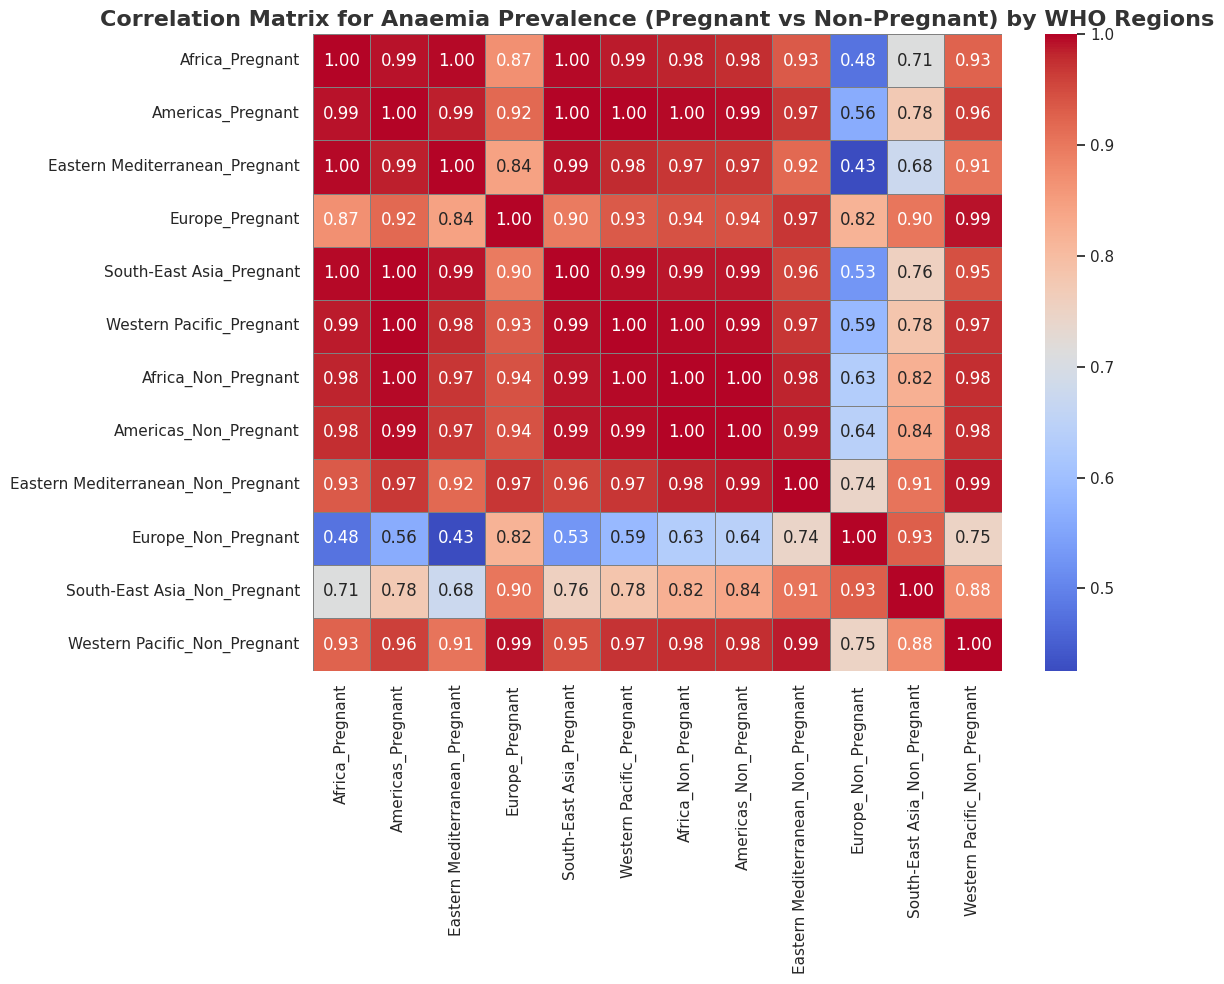

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your CSV files into separate DataFrames
df_pregnant = pd.read_csv('/content/WHO_Region_data_Pregnant.csv')  # Replace with your actual file path
df_non_pregnant = pd.read_csv('/content/WHO_Region_data_Non_Pregnant.csv')  # Replace with your actual file path

# Function to extract the numeric part of the 'First Tooltip' values
def extract_numeric(value):
    try:
        return float(value.split()[0])
    except (ValueError, AttributeError, IndexError):
        return None

# Extract hemoglobin levels for each region in the pregnant and non-pregnant datasets
df_pregnant['Hemoglobin_Level'] = df_pregnant['First Tooltip'].apply(extract_numeric)
df_non_pregnant['Hemoglobin_Level'] = df_non_pregnant['First Tooltip'].apply(extract_numeric)

# Ensure alignment by Period (Year) if needed
df_pregnant = df_pregnant[['Location', 'Period', 'Hemoglobin_Level']]
df_non_pregnant = df_non_pregnant[['Location', 'Period', 'Hemoglobin_Level']]

# Pivot the data to have regions as columns and years as rows
df_pregnant_pivot = df_pregnant.pivot(index='Period', columns='Location', values='Hemoglobin_Level')
df_non_pregnant_pivot = df_non_pregnant.pivot(index='Period', columns='Location', values='Hemoglobin_Level')

# Rename columns to differentiate between Pregnant and Non-Pregnant
df_pregnant_pivot.columns = [f"{col}_Pregnant" for col in df_pregnant_pivot.columns]
df_non_pregnant_pivot.columns = [f"{col}_Non_Pregnant" for col in df_non_pregnant_pivot.columns]

# Combine the DataFrames on the Period index
df_combined = pd.concat([df_pregnant_pivot, df_non_pregnant_pivot], axis=1)

# Display the first few rows of the combined DataFrame
print("\nCombined DataFrame:")
print(df_combined.head())

# Calculate the correlation matrix for the combined DataFrame
corr_matrix = df_combined.corr()

# Enhanced Correlation Matrix Heatmap
plt.figure(figsize=(12, 10))

# Set the theme for a clean look
sns.set_theme(style="white")

# Create the heatmap with additional styling
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, linecolor='gray', cbar_kws={"shrink": 1})

# Customize the title and layout
plt.title('Correlation Matrix for Anaemia Prevalence (Pregnant vs Non-Pregnant) by WHO Regions', fontsize=16, fontweight='bold', color='#333333')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

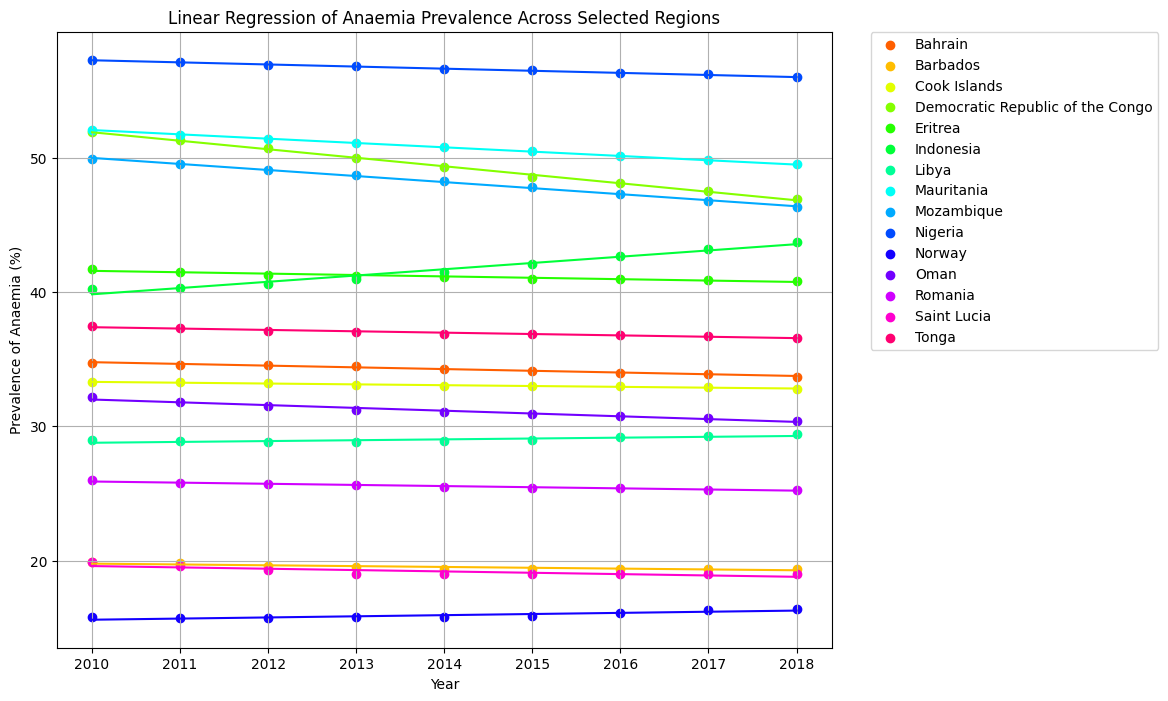

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression  # Import LinearRegression

# Load the dataset
file_path = '/content/Pregnant_data.csv'
df = pd.read_csv(file_path)

# Extract the first numeric part of 'First Tooltip' and convert to float
df['Prevalence'] = df['First Tooltip'].apply(lambda x: float(x.split()[0]))

# Ensure 'Period' is numeric and filter the data from 2010 to 2018
df['Period'] = pd.to_numeric(df['Period'])
df = df[(df['Period'] >= 2010) & (df['Period'] <= 2018)]

# Rename columns for clarity
df.rename(columns={'Location': 'Region', 'Period': 'Year'}, inplace=True)

# Randomly select 20 unique countries (remove or change random_state for different selections)
selected_countries = df['Region'].drop_duplicates().sample(n=15)

# Filter the dataset to include only the selected countries
df = df[df['Region'].isin(selected_countries)]

# Extract unique regions (countries)
regions = df['Region'].unique()

# Prepare the plot
plt.figure(figsize=(10, 8))

# Dictionary to store colors for each region
colors = sns.color_palette("hsv", len(regions))

# Plot data points and regression lines for each region
for i, region in enumerate(regions):
    region_data = df[df['Region'] == region]

    # Scatter plot of actual data points
    plt.scatter(region_data['Year'], region_data['Prevalence'], color=colors[i], label=region)

    # Perform linear regression
    X = region_data['Year'].values.reshape(-1, 1)
    y = region_data['Prevalence'].values
    model = LinearRegression().fit(X, y)
    y_pred = model.predict(X)

    # Plot regression line
    plt.plot(region_data['Year'], y_pred, color=colors[i])

# Customize the plot
plt.title('Linear Regression of Anaemia Prevalence Across Selected Regions')
plt.xlabel('Year')
plt.ylabel('Prevalence of Anaemia (%)')
plt.legend(loc='best', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.grid(True)
plt.show()

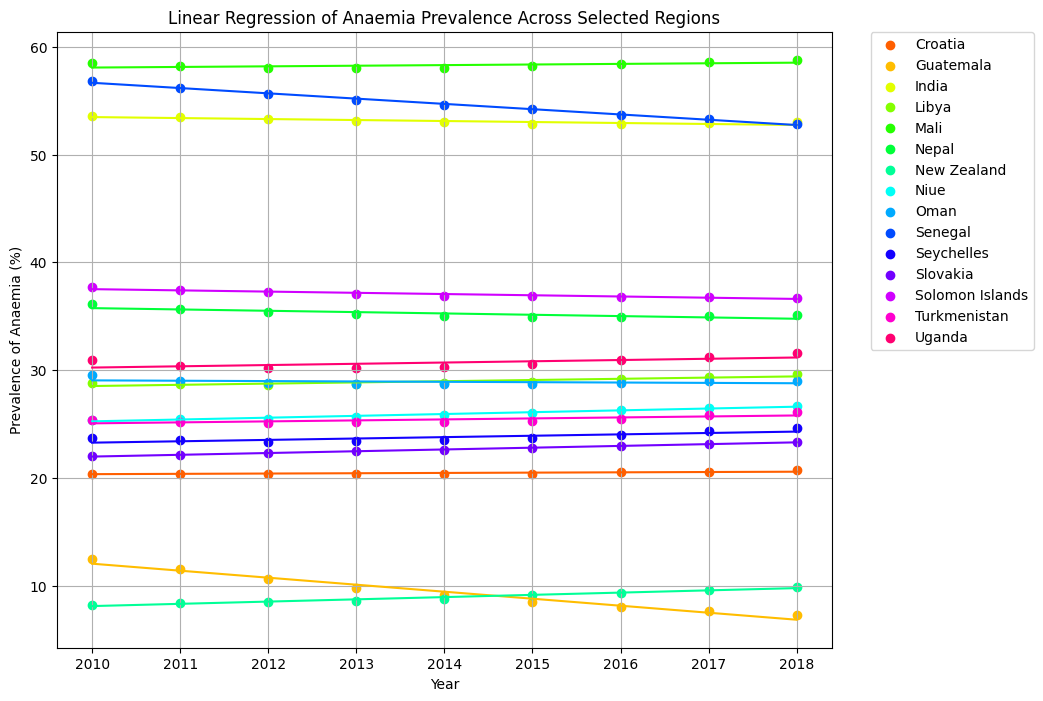

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression  # Import LinearRegression

# Load the dataset
file_path = '/content/Non_Pregnant_data.csv'
df = pd.read_csv(file_path)

# Extract the first numeric part of 'First Tooltip' and convert to float
df['Prevalence'] = df['First Tooltip'].apply(lambda x: float(x.split()[0]))

# Ensure 'Period' is numeric and filter the data from 2010 to 2018
df['Period'] = pd.to_numeric(df['Period'])
df = df[(df['Period'] >= 2010) & (df['Period'] <= 2018)]

# Rename columns for clarity
df.rename(columns={'Location': 'Region', 'Period': 'Year'}, inplace=True)

# Randomly select 20 unique countries (remove or change random_state for different selections)
selected_countries = df['Region'].drop_duplicates().sample(n=15)

# Filter the dataset to include only the selected countries
df = df[df['Region'].isin(selected_countries)]

# Extract unique regions (countries)
regions = df['Region'].unique()

# Prepare the plot
plt.figure(figsize=(10, 8))

# Dictionary to store colors for each region
colors = sns.color_palette("hsv", len(regions))

# Plot data points and regression lines for each region
for i, region in enumerate(regions):
    region_data = df[df['Region'] == region]

    # Scatter plot of actual data points
    plt.scatter(region_data['Year'], region_data['Prevalence'], color=colors[i], label=region)

    # Perform linear regression
    X = region_data['Year'].values.reshape(-1, 1)
    y = region_data['Prevalence'].values
    model = LinearRegression().fit(X, y)
    y_pred = model.predict(X)

    # Plot regression line
    plt.plot(region_data['Year'], y_pred, color=colors[i])

# Customize the plot
plt.title('Linear Regression of Anaemia Prevalence Across Selected Regions')
plt.xlabel('Year')
plt.ylabel('Prevalence of Anaemia (%)')
plt.legend(loc='best', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.grid(True)
plt.show()

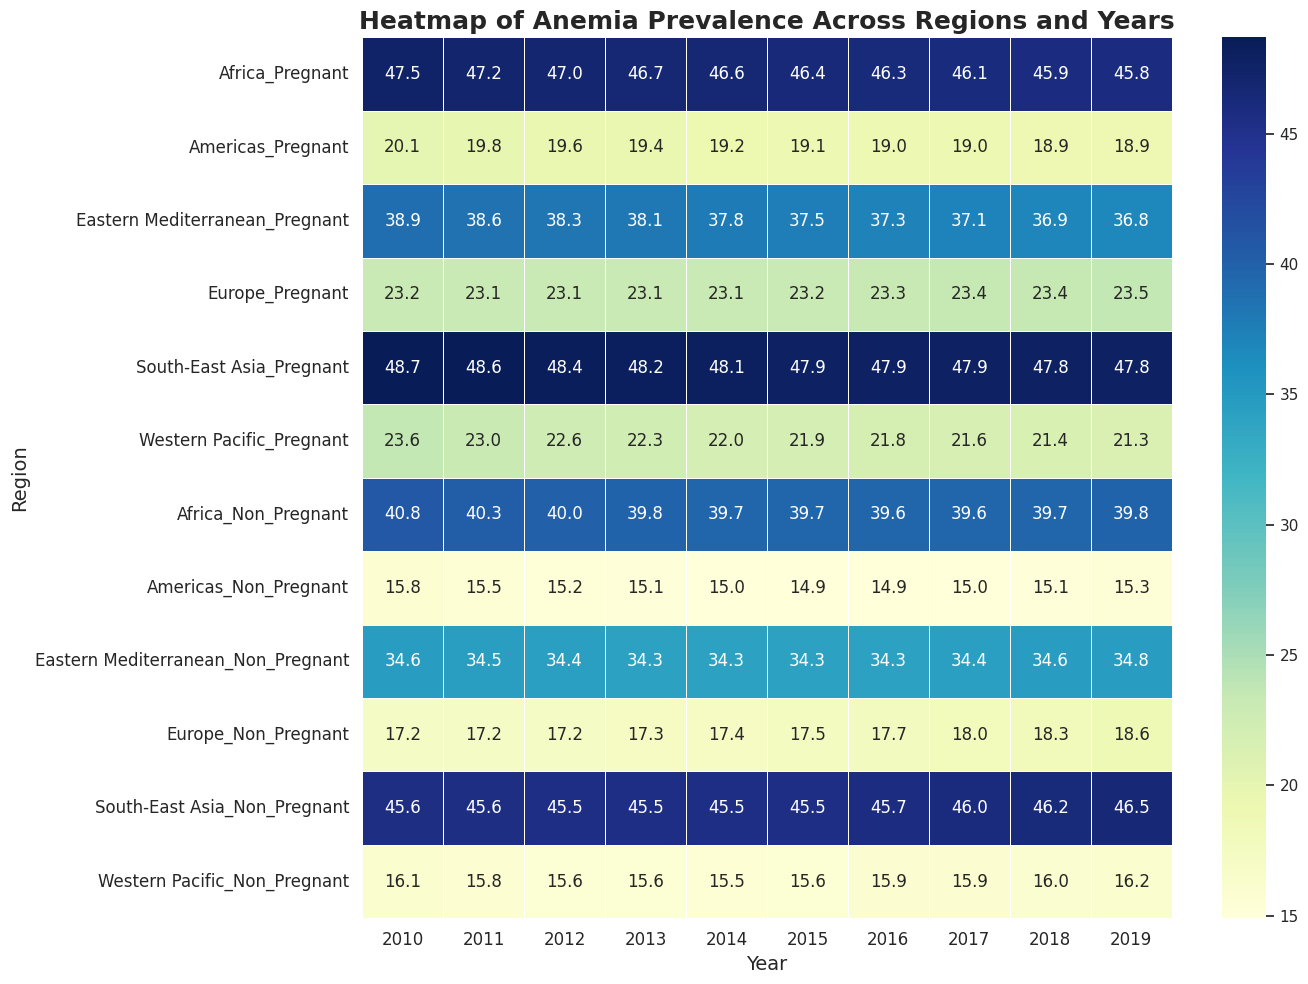

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your CSV files into separate DataFrames
df_pregnant = pd.read_csv('/content/WHO_Region_data_Pregnant.csv')  # Replace with your actual file path
df_non_pregnant = pd.read_csv('/content/WHO_Region_data_Non_Pregnant.csv')  # Replace with your actual file path

# Function to extract the numeric part of the 'First Tooltip' values
def extract_numeric(value):
    try:
        return float(value.split()[0])
    except (ValueError, AttributeError, IndexError):
        return None

# Extract hemoglobin levels for each dataset and remove rows with invalid data
df_pregnant['hemoglobin_level'] = df_pregnant['First Tooltip'].apply(extract_numeric)
df_pregnant = df_pregnant.dropna(subset=['hemoglobin_level'])

df_non_pregnant['hemoglobin_level'] = df_non_pregnant['First Tooltip'].apply(extract_numeric)
df_non_pregnant = df_non_pregnant.dropna(subset=['hemoglobin_level'])

# Pivot the data to have regions as the index (y-axis) and years as columns (x-axis)
df_pregnant_pivot = df_pregnant.pivot(index='Location', columns='Period', values='hemoglobin_level')
df_non_pregnant_pivot = df_non_pregnant.pivot(index='Location', columns='Period', values='hemoglobin_level')

# Rename index to differentiate between Pregnant and Non-Pregnant
df_pregnant_pivot.index = [f"{region}_Pregnant" for region in df_pregnant_pivot.index]
df_non_pregnant_pivot.index = [f"{region}_Non_Pregnant" for region in df_non_pregnant_pivot.index]

# Combine the DataFrames on the Location index (regions)
df_combined = pd.concat([df_pregnant_pivot, df_non_pregnant_pivot])

# Filter data to only include the years 2010 to 2019
df_combined = df_combined.loc[:, 2010:2019]

# Set up the heatmap
plt.figure(figsize=(14, 10))

# Customize the heatmap
sns.heatmap(df_combined, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=0.5, linecolor='white', cbar_kws={"shrink": 1})

# Customize the title and labels
plt.title('Heatmap of Anemia Prevalence Across Regions and Years', fontsize=18, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Region', fontsize=14)

# Adjust the ticks and layout for better appearance
plt.xticks(rotation=0, ha='center', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

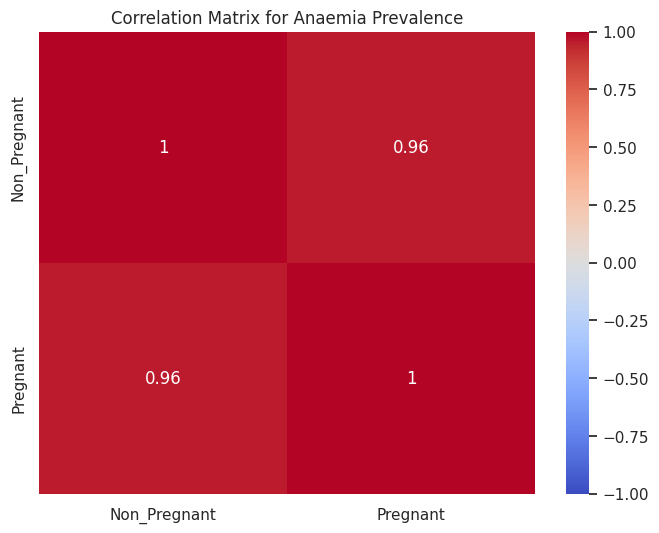

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
non_pregnant_df = pd.read_csv('/content/Non_Pregnant_data.csv')
pregnant_df = pd.read_csv('/content/Pregnant_data.csv')

# Extract relevant information and compute average prevalence by region
non_pregnant_df['Prevalence'] = non_pregnant_df['First Tooltip'].str.extract(r'(\d+\.\d+)').astype(float)
pregnant_df['Prevalence'] = pregnant_df['First Tooltip'].str.extract(r'(\d+\.\d+)').astype(float)

# Assuming the Location column can be mapped to the regions in the original plot
non_pregnant_avg = non_pregnant_df.groupby('Location')['Prevalence'].mean()
pregnant_avg = pregnant_df.groupby('Location')['Prevalence'].mean()

# Create a combined dataframe
combined_df = pd.DataFrame({
    'Non_Pregnant': non_pregnant_avg,
    'Pregnant': pregnant_avg
})

# Calculate the correlation matrix
correlation_matrix = combined_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Anaemia Prevalence')
plt.show()